# Final exercise: Help Sally restore her graduation photo
You're going to use all the knowledge adquired during the course to complete a final challenge: reconstruct a very damaged photo.

Help Sally restore her favorite portrait which was damaged with noise, distorsion and missing information due to a breach in her laptop. 

You will be fixing these problems by transforming the images to be upright, applying noise reduction and reconstructing the damaged parts. 

And at the end, you will apply face detection on the resulting image to make sure the face of Sally is there.




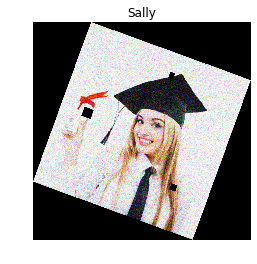

In [21]:
# Pre loaded code
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import random
from skimage import data, img_as_float, io
from skimage.util import random_noise
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral, denoise_nl_means, denoise_tv_bregman, inpaint)
from skimage import transform as tf
from skimage.feature import Cascade
# Load the trained file for face detection from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()


def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

def show_detected_face(result, detected):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2
            )
        )
    plt.show()
    
def show_image(image):
    plt.imshow(image)
    plt.title("Sally")
    plt.axis('off')
    plt.show()
 

sigma = 0.155
original = io.imread('sally2.jpg')
noisy_img = random_noise(original, var=sigma**2)

# Create mask with three defect regions: left, middle, right respectively
mask = np.zeros(noisy_img.shape[:-1])
mask[380:400, 400:420] = 1
mask[250:280, 70:100] = 1
mask[60:80, 280:295] = 1

# Defect image over the same region in each color channel
defect = noisy_img.copy()
for layer in range(defect.shape[-1]):
    defect[np.where(mask)] = 0

# rotate
rotated_output = tf.rotate(defect, -20, resize=True)

show_image(rotated_output)

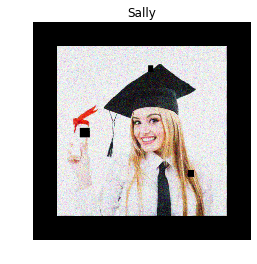

In [13]:
upright_img = tf.rotate(rotated_output, 20)

show_image(upright_img)

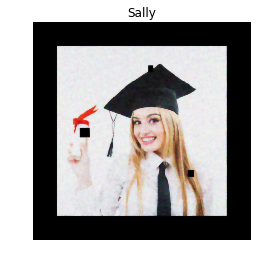

In [14]:
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)
show_image(upright_img_without_noise)

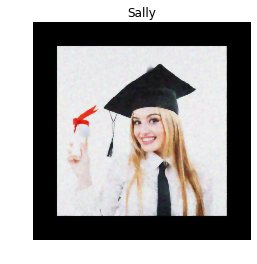

In [16]:
# Reconstruct the image
result = inpaint.inpaint_biharmonic(upright_img_without_noise, get_mask(upright_img), multichannel=True)
show_image(result)

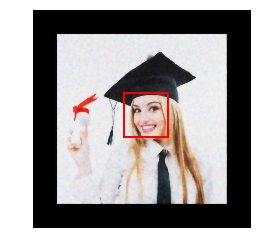

In [8]:
# Initialize the detector cascade.
detector = Cascade(trained_file)

detected = detector.detect_multi_scale(img=result,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(100, 100),
                                       max_size=(200, 200))
show_detected_face(result, detected)